# Carga de datos con pd.read


In [58]:
import pandas as pd
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/titanic/titanic3.csv"
data = pd.read_csv(url)

### ejemplo uso read.csv
read.csv(filepath="/Users/gonza/Downloads/..", sep=",",dtype={"Ingresos":np.float64,"edad":np.int32},header=0,
        names={"ingresos","edad"},skiprows=12,index_col=None, skip_blank_lines=False,na_filter=False)

In [59]:
# correlacion entre variables
import pandas as pd
url2 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
data_ads = pd.read_csv(url2)
data_ads.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [60]:
# ver coorelacion entre publicidad y ventas
data_ads.corr()[["Sales"]].abs().sort_values(by="Sales", ascending=False)[1:].style.background_gradient(cmap='Oranges')

,Sales
TV,0.782224
Radio,0.576223
Newspaper,0.228299


In [61]:
    # hacemos la correlacion manual, creando una columna
    import numpy as np
    data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [62]:
data_ads.head(3)

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206


In [63]:
data_ads["corr1"] =   (data_ads["TV"] - np.mean(data_ads["TV"]))**2
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2
data_ads.head(3)

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006


In [64]:
coef_pearson = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"])) 
coef_pearson

0.782224424861606

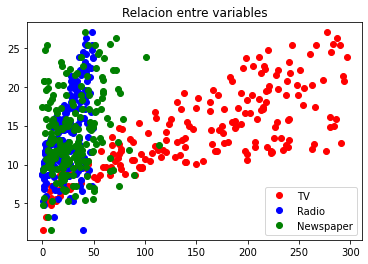

In [65]:
import matplotlib.pyplot as plt
plt.plot(data_ads["TV"],data_ads["Sales"],"ro", label="TV")
plt.plot(data_ads["Radio"],data_ads["Sales"],"bo",label="Radio")
plt.plot(data_ads["Newspaper"],data_ads["Sales"],"go",label="Newspaper")
plt.title("Relacion entre variables")
plt.legend()

In [66]:
data_ads.corr().abs().sort_values(by="Sales", ascending=False)[1:].style.background_gradient(cmap='RdPu')

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
TV,1,0.0548087,0.0566479,0.782224,0.129791,0.0787974,0.0759153
Radio,0.0548087,1,0.354104,0.576223,0.333135,0.0968838,0.402556
corr2,0.0759153,0.402556,0.142256,0.322686,0.894818,0.53624,1
Newspaper,0.0566479,0.354104,1,0.228299,0.124422,0.081003,0.142256
corr1,0.0787974,0.0968838,0.081003,0.146003,0.744287,1,0.53624
corrn,0.129791,0.333135,0.124422,0.0961527,1,0.744287,0.894818


# modelo regresion lineal
## modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos segun una N(1.5,2.5)
* Ye = 5 + 1.9 * x + e
* estara distribuido segun N(0, 0.8)



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 5 + 1.9 * x
y_act = 5 + 1.9 * x + res

In [69]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [70]:
dato = pd.DataFrame(
    {"x": x_list,
    "y_act": y_act_list,
    "y_pred" : y_pred_list,
    }
)

In [71]:
dato.head()

,x,y_act,y_pred
0,4.806277,14.112491,14.131927
1,-5.806866,-5.460514,-6.033046
2,4.227419,11.539439,13.032095
3,1.806000,8.482312,8.431400
4,-3.407904,-1.952924,-1.475018


Text(0.5, 1.0, 'Valor actualr vs prediccion')

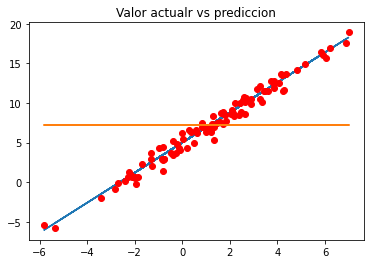

In [72]:
# pintamos los datos junto con la media
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]
plt.plot(x, y_pred)
plt.plot(x, y_act,"ro")
plt.plot(x, y_mean,linestyle="-")
plt.title("Valor actualr vs prediccion")

In [73]:
# calculamos la summa de los errores cuadrado a la recta , a la media y los totales // R2 = SSR/SST (cuando mas cerca de uno mejor, pero solo es un indicador, hay que ver otros para confirmar que el modelo esta bien)
dato["SSR"] = (dato["y_pred"] - np.mean(dato["y_act"]))**2
dato["SSD"] = (dato["y_pred"] - dato["y_act"])**2
dato["SST"] = (dato["y_act"] - np.mean(dato["y_act"]))**2

In [74]:
dato.head()

,x,y_act,y_pred,SSR,SSD,SST
0,4.806277,14.112491,14.131927,46.930876,0.000378,46.664967
1,-5.806866,-5.460514,-6.033046,177.272215,0.327793,162.354214
2,4.227419,11.539439,13.032095,33.071470,2.228023,18.131617
3,1.806000,8.482312,8.431400,1.322695,0.002592,1.442394
4,-3.407904,-1.952924,-1.475018,76.673372,0.228394,85.271170


In [75]:
SSR=sum(dato["SSR"])
SSD=sum(dato["SSD"])
SST=sum(dato["SST"])

In [76]:
display("SSR=",SSR,
        "SSD=", SSD,
        "SST=", SST)

'SSR='

2347.01539491607

'SSD='

54.016745411932725

'SST='

2435.3224101865303

In [77]:
R2 = SSR/SST
R2

0.9637390864958629

(array([ 7., 15., 12., 17., 13., 20.,  9.,  2.,  3.,  2.]),
 array([-1.24927018, -0.90678924, -0.56430831, -0.22182737,  0.12065356,
         0.4631345 ,  0.80561544,  1.14809637,  1.49057731,  1.83305824,
         2.17553918]),
 <a list of 10 Patch objects>)

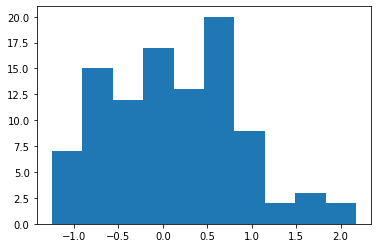

In [78]:
# la ssd( suma cuadrado diferencias) tiene una distribucion  normal
plt.hist((dato["y_pred"]-dato["y_act"]))

### Como es la prediccion de buena ?
* SST = SSD + SSR
* SST : variabilidad de los datos con respecto a la media
* SSD : diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar(erroreres que deberian sequir una distribucion normal)
* SSR : diferencia entre la regresion y el valor medio del modelo que queremos buscar
* R2 = SSR/SST, coeficiente de determinacion entre 1 y 0

### Regresion lineal simple en python
El paquete statsmodel para regresion lineal

In [79]:
url3 = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
dat = pd.read_csv(url3)
dat.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [80]:
import statsmodels.formula.api as smf

In [81]:
lm = smf.ols(formula="Sales~TV", data=dat).fit()

In [82]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

el modelo lineal predictivo seria
sales = 7.032594 + 0.047537*TV

In [83]:
# podemos preguntar cuales son los p valores al modelo
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [84]:
#R2
lm.rsquared

0.611875050850071

In [85]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.47e-42
Time:                        16:56:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# prediccion ( recordar que solo estamos usando una variable)
sales_pred = lm.predict(pd.DataFrame(dat["TV"]))
sales_pred 


0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

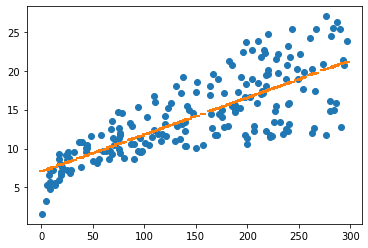

In [87]:
plt.scatter(x="TV",y="Sales",data=dat)
plt.scatter(x=dat["TV"],y=sales_pred, marker="_",linewidth=2)

In [88]:
dat["sales_pred"] = 7.032594 + 0.047537*dat["TV"]

el error estandar residual (RSE), la raiz cuadrada de la media de la suma de los residuos al cuadrado, nos dara una estimcoin sobre la desviacion promedo de cualquier punto respecto a la verdadera recta de regresion

In [89]:
dat["RSE"] = (dat["Sales"] - dat["sales_pred"])**2
SSD = sum(dat["RSE"])
RSE = np.sqrt(SSD/(len(dat)-2))

In [90]:
display(f"El error estandar residual es: {RSE}")

'El error estandar residual es: 3.258656369238098'

In [91]:
# La media de venta (sales_m), y sacamos la parte del modelo que no puede ser explicada (error)
sales_m = np.mean(dat["Sales"])
error = RSE/sales_m
print(f"la parte del modelo que no puede ser explicada es un {round(error*100,2)} por ciento")

la parte del modelo que no puede ser explicada es un 23.24 por ciento


### Regresion Multiple
como la parte de modelo que no puedes ser explicada es muy alta, usaremos mas variables (radio, y prensa); una regresion multiple 

In [92]:
# usamos todas las variables y despues nos quedamos con las que tengan pvalor bajo (0,05); tambien las que tengan error cuadrado ajustado bajo. tambien podemos hacer lo contrario, añadir una por una y ver como trabaja el modelo (python puede hacer las dos cosas)
# partimos del modelo de antes y vamos añadiendo variables
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=dat).fit()

In [93]:
# los datos del la ecuacion lineal y = a + bx (ordanada en origen(intercept) y pendiente)
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [94]:
# comprobamos p valores
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

el modelo sugiere, al ser tan bajos los pvalues, que los tres parametros son buenos y qaue no son nulos
Sales = 5.774948 + 0.046901*Tv + 0.044219*Newspaper

In [95]:
display (lm2.rsquared, lm2.rsquared_adj)

0.6458354938293271

0.6422399150864777

In [96]:
# calculamos las prediciones
sales_pred = lm2.predict(dat[["TV","Newspaper"]])

In [97]:
sales_pred[:5]

0    19.626901
1     9.856348
2     9.646055
3    15.467318
4    16.837102
dtype: float64

In [98]:
# calculamos las suma de las diferencias y las desviacion del error (Rse)
SSD = sum((dat["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(dat)-3)) # porque la formula es siempre numero de varialbes menos 1 (-2-1)
display (SSD, RSE)

1918.561811896827

3.120719860252885

In [99]:
# resumen global
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           3.95e-45
Time:                        16:56:25   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# con otra variable
lm3 = smf.ols(formula="Sales~TV+Newspaper+Radio", data=dat).fit()

In [101]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        16:56:25   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*vemos que r2 ha mejorado , que pvalor (Prob (F-statistic) porque es regresion multiple, 483e-98 = 0.00..hasta 98) tambien es muy bajo, vemos que el coeficiente de radio ha aumentado ( es lo que mas influye)
*tambien vemos que hay una varible que resta (newspaper) con pvalue muy alto 0.86 ( si la quitamos de la ecuacion daria mejor resultado)

### Multicolinealidad
la razon que añadiendo la variable newspaper empeora el sistema es debido a la Multicolinealidad; cuando hay relacion entre dos variantes predictoeras (ejemplo vemos que hay corr entre newspaper y radio)

In [110]:
data_ads.corr().iloc[:4,:4].abs().style.background_gradient(cmap='Oranges')

,TV,Radio,Newspaper,Sales
TV,1,0.0548087,0.0566479,0.782224
Radio,0.0548087,1,0.354104,0.576223
Newspaper,0.0566479,0.354104,1,0.228299
Sales,0.782224,0.576223,0.228299,1


### calculamos factor de inflacion de la varianza
* vif = 1 : las variables no estan corr
* vif < 5 :las variables tienen una corr moderada y pueden usarse
* vif > 5 : las variables estan altamente corr y no pueden usarse en el modelo

In [111]:
# Newspaper ~ TV+Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=dat).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.145187378723929

In [112]:
# TV ~ Newspaper+Radio -> R^2 VIF = 1/(1-R^2)
lm_t = smf.ols(formula="TV~Newspaper+Radio", data=dat).fit()
rsquared_t = lm_t.rsquared
VIF = 1/(1-rsquared_t)
VIF

1.0046107849396502

In [113]:
# Radio ~ TV+Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~TV+Newspaper", data=dat).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055351